<a href="https://colab.research.google.com/github/King-Bowie/Estatistica_IBGE/blob/main/An%C3%A1lise_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=Red size=10>Análise estatística - PARTE 1</font>
***

## Trabalho da faculdade de Análise Descritiva de um conjunto de dados do PNAD

Essa é uma versão de um projeto que eu havia realizado e adaptado para o trabalho final da matéria Tópicos em Big Data em Python

Utilizando os conhecimentos adquiridos em estudos durante as aulas na faculdade, realizo uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Será utilizado: histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados e respeitando o enunciado do trabalho acadêmico.

# <font color=Red>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sns.set_theme(style="whitegrid")

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [3]:
dados = pd.read_csv('https://raw.githubusercontent.com/King-Bowie/Estatistica_IBGE/main/dados/dados.csv')

# Analisando os detalhes dataset

In [4]:
dados.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

In [5]:
dados.shape

(76840, 7)

### Visualize o conteúdo do DataFrame

In [6]:
dados.head(10)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


In [7]:
dados.head(20).max()

UF                  11.000000
Sexo                 1.000000
Idade               62.000000
Cor                  8.000000
Anos de Estudo      16.000000
Renda             7000.000000
Altura               1.793203
dtype: float64

In [8]:
dados.tail(20).min()

UF                 53.000000
Sexo                0.000000
Idade              20.000000
Cor                 2.000000
Anos de Estudo      1.000000
Renda             812.000000
Altura              1.584493
dtype: float64

Atraves das duas ultimas celulas podemos ver que a renda entre os 20 dados (tanto do começo quanto o fim) da amostra que possuimos casos de onde podemos analisar que a renda não está muito ligada no outlier.

In [9]:
dados.corr("pearson")

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
UF,1.000000,0.001479,0.019818,-0.252820,0.123380,0.127939,-0.000552
Sexo,0.001479,1.000000,0.002994,-0.003193,0.115662,-0.086826,0.001315
Idade,0.019818,0.002994,1.000000,-0.058952,-0.267614,0.041357,-0.001470
Cor,-0.252820,-0.003193,-0.058952,1.000000,-0.173609,-0.151921,-0.002849
Anos de Estudo,0.123380,0.115662,-0.267614,-0.173609,1.000000,0.332152,0.003817
Renda,0.127939,-0.086826,0.041357,-0.151921,0.332152,1.000000,-0.004073
Altura,-0.000552,0.001315,-0.001470,-0.002849,0.003817,-0.004073,1.000000


In [10]:
dados["Cor"].value_counts()

8    35925
2    31815
4     8391
0      357
6      352
Name: Cor, dtype: int64

In [11]:
dados["Sexo"].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

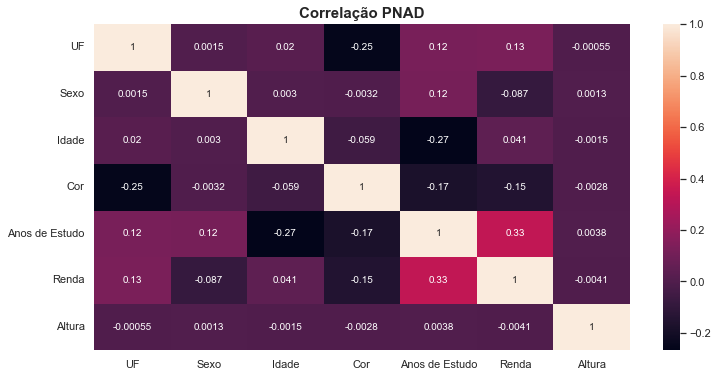

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(dados.corr('pearson'), annot=True)
plt.title('Correlação PNAD',fontsize=15, fontweight = 'bold')
plt.show()

C:\Users\reina\AppData\Local\Temp\ipykernel_11208\1060747800.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  scatter.set_xticklabels(['0 ano','2 anos','4 anos','6 anos',


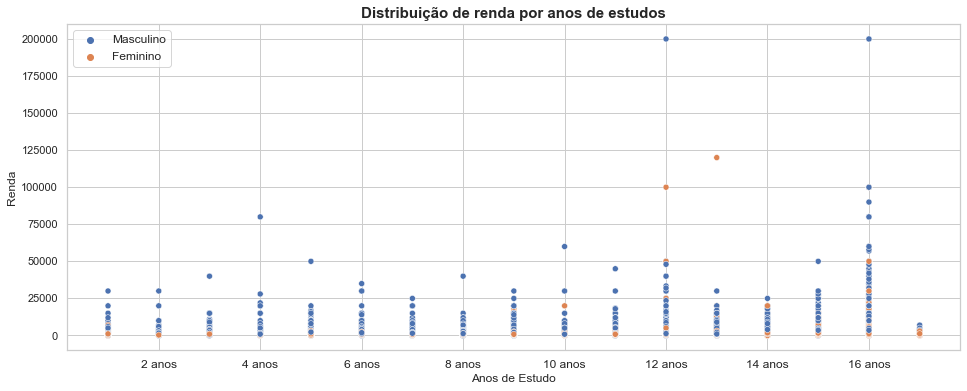

In [67]:
plt.figure(figsize=(16,6))
scatter = sns.scatterplot(x=dados['Anos de Estudo'], y=dados['Renda'], hue=dados['Sexo'], data=dados)
plt.title('Distribuição de renda por anos de estudos',fontsize=15, fontweight = 'bold')
scatter.set_xticklabels(['0 ano','2 anos','4 anos','6 anos',
                         '8 anos','10 anos','12 anos',
                         '14 anos','16 anos'],fontsize=12)
handles, _ = scatter.get_legend_handles_labels()
scatter.legend(handles,['Masculino','Feminino'], fontsize=12)

plt.show()

<Figure size 1872x1152 with 0 Axes>

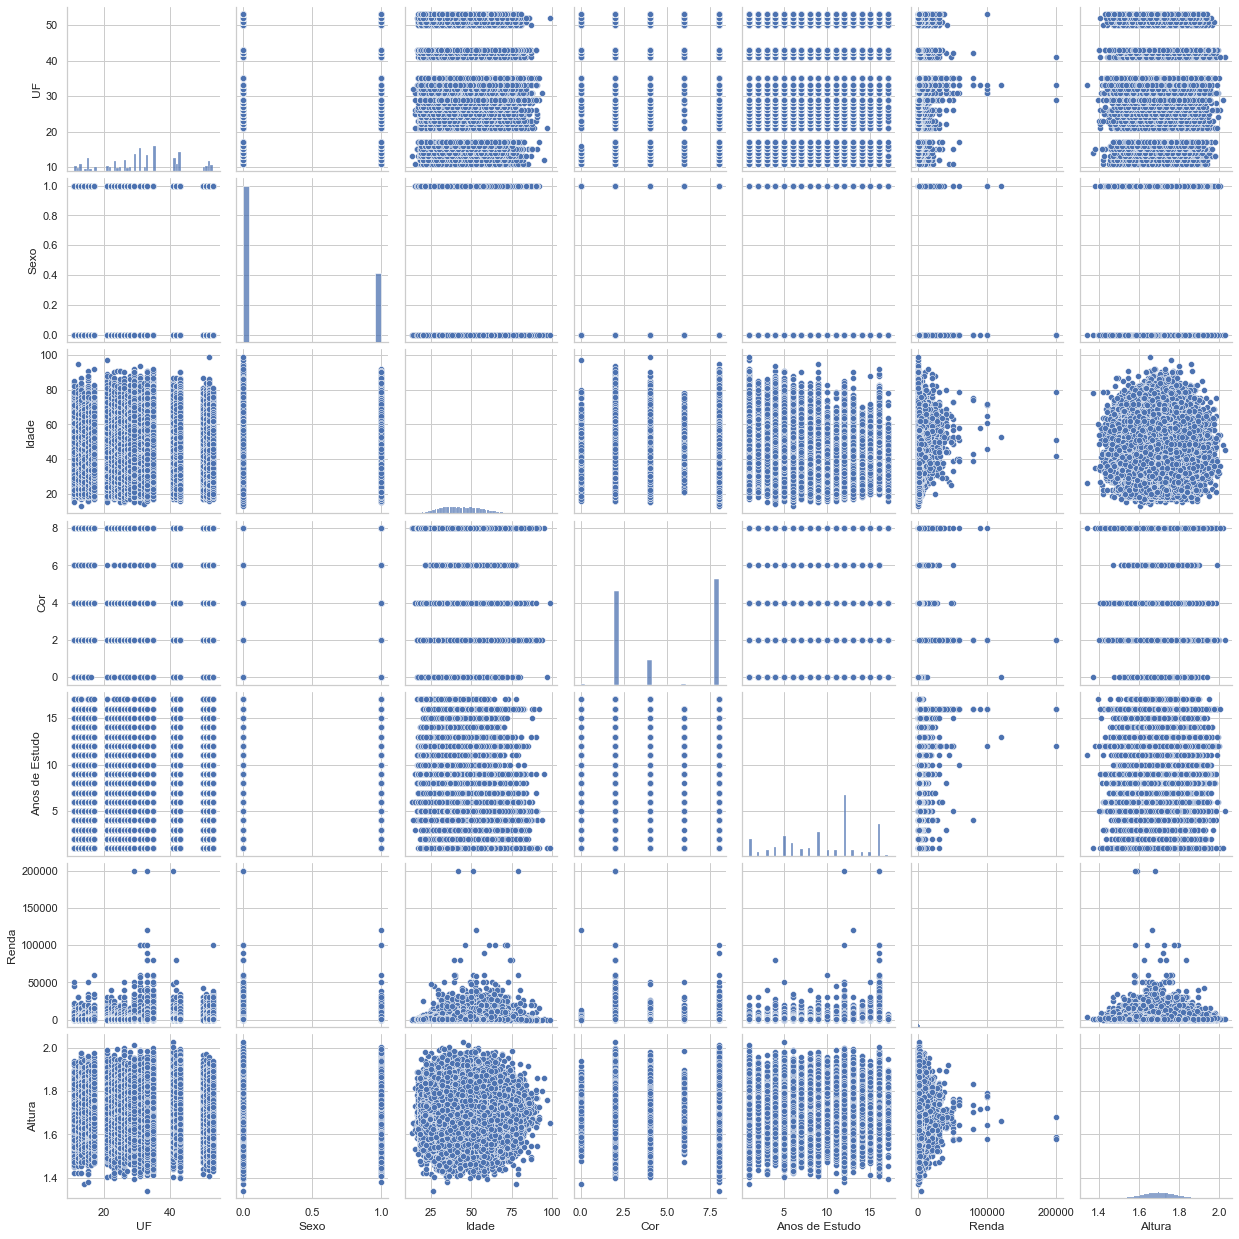

In [48]:
plt.figure(figsize=(26,16))
sns.pairplot(dados)
plt.show()

### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

### 1º Definir os intevalos das classes em reais (R$)

In [15]:
dados.Renda.max()

200000

In [16]:
dados.Renda.min()

0

In [17]:
classes = [dados.Renda.min(),2*788,5*788,15*788,25*788,dados.Renda.max()]

### 2º Definir os labels das classes

In [18]:
labels = [ 'Até 2 SM','Até 5 SM','Até 15 SM','Até 25 SM','Acima 25 SM']

### 3º Construir a coluna de frequências

In [19]:
pd.cut(x = dados.Renda,
            bins = classes,
            labels = labels,
            include_lowest = True)

0        Até 2 SM
1        Até 2 SM
2        Até 2 SM
3        Até 5 SM
4        Até 2 SM
           ...   
76835    Até 2 SM
76836    Até 2 SM
76837    Até 2 SM
76838    Até 2 SM
76839    Até 2 SM
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['Até 2 SM' < 'Até 5 SM' < 'Até 15 SM' < 'Até 25 SM' < 'Acima 25 SM']

In [20]:
contagem = pd.value_counts(
                pd.cut(x = dados.Renda,
                bins = classes,
                labels = labels,
                include_lowest = True)
           )
contagem

Até 2 SM       49755
Até 5 SM       18602
Até 15 SM       7241
Até 25 SM        822
Acima 25 SM      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [21]:
porcentagem = pd.value_counts(
                pd.cut(x = dados.Renda,
                          bins = classes,
                          labels = labels,
                          include_lowest = True),
              normalize = True) * 100

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [22]:
tabela_rendas = pd.DataFrame( {'Porcentagem (%)': porcentagem, 'Frequência': contagem})
tabela_rendas

,Porcentagem (%),Frequência
Até 2 SM,64.751432,49755
Até 5 SM,24.208745,18602
Até 15 SM,9.423477,7241
Até 25 SM,1.069755,822
Acima 25 SM,0.546590,420


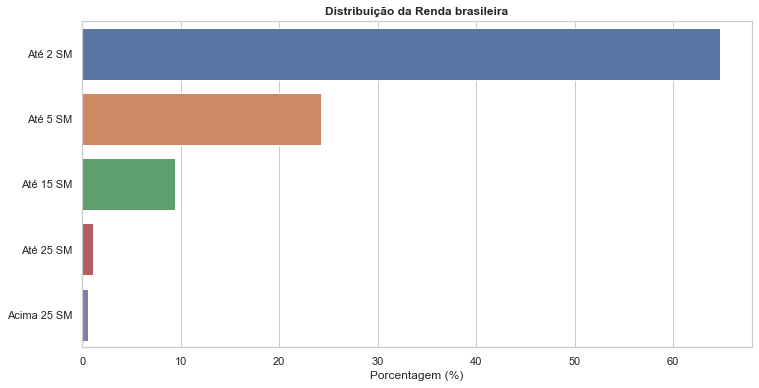

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(data= tabela_rendas, x= tabela_rendas['Porcentagem (%)'],
            y=tabela_rendas.index,
            orient='h')
plt.title('Distribuição da Renda brasileira',fontweight= 'bold')
plt.show()

> ### Conclusões

Podemos analisar que grande parte da população (acima de 60%) recebe até 2 salários mínimos, e vai diminuindo a frequência de pessoas de forma desproporcional de acordo com o aumento das classes salariais. 

Este é o retrato da desiguadade de renda no Brasil em 2015.

Saiba mais: <a href='https://exame.com/economia/brasil-e-mais-desigual-do-que-se-imaginava-diz-pesquisador/'> reportagem do jornal Exame publicada em 2016</a>

### Histograma com as variáveis QUANTITATIVAS de nosso dataset


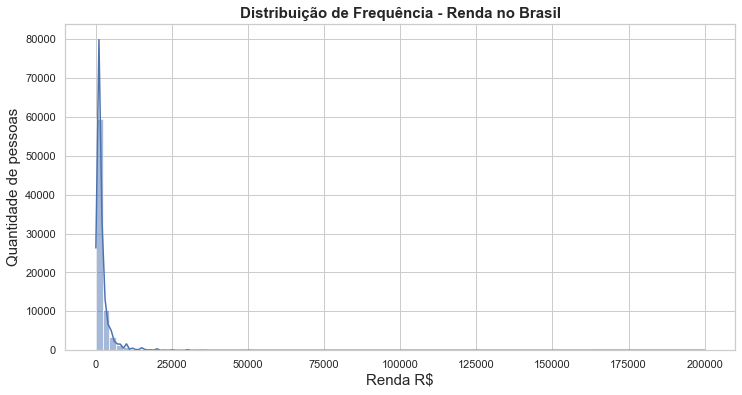

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(dados['Renda'],kde=True,bins=90)
plt.ylabel('Quantidade de pessoas',fontsize=15)
plt.xlabel('Renda R$',fontsize=15)
plt.title('Distribuição de Frequência - Renda no Brasil',fontsize=15, fontweight = 'bold')
plt.show()

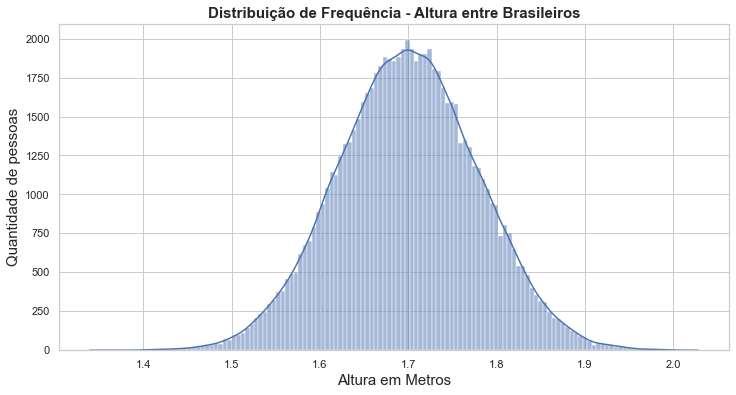

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(dados.Altura,kde=True)
plt.ylabel('Quantidade de pessoas',fontsize=15)
plt.xlabel('Altura em Metros',fontsize=15)
plt.title('Distribuição de Frequência - Altura entre Brasileiros',fontsize=15, fontweight = 'bold')
plt.show()

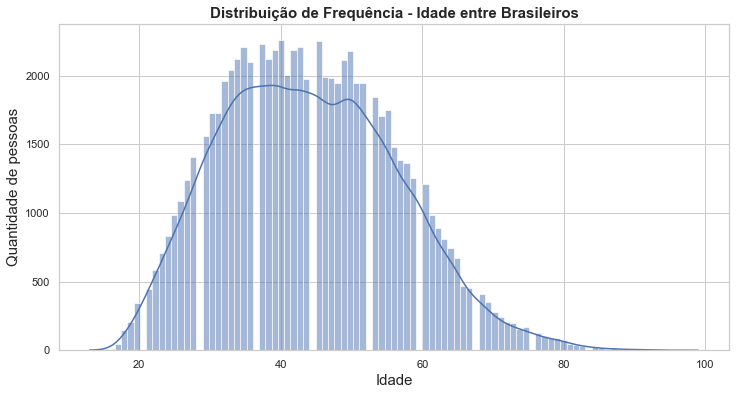

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(dados.Idade,kde=True)
plt.ylabel('Quantidade de pessoas',fontsize=15)
plt.xlabel('Idade',fontsize=15)
plt.title('Distribuição de Frequência - Idade entre Brasileiros',fontsize=15, fontweight = 'bold')
plt.show()

> ### Conclusões
***
Através destes dados encontramos um **padrão entre a maioria da população brasileira**: 

* Recebem até 2 salários mínimos,

* (Elaboração própria) Possui aproximadamente 1,70 metros de altura.

* Entre a faixa de idade entre 35 e 55 anos.


Algo intrigante são os vales nas idades que pode ter sido alterado pelos entrevistados onde provavelmente disseram que tinha por exemplo 20 anos mas tinha 21. 


Análises estatísticas:

1. Renda possui uma assimetria à direita,

2. Altura possui simetria entre suas medidas,

3. Idade possui assimetria à direita.




### Análise da variável RENDA com limite de 20 mil reais

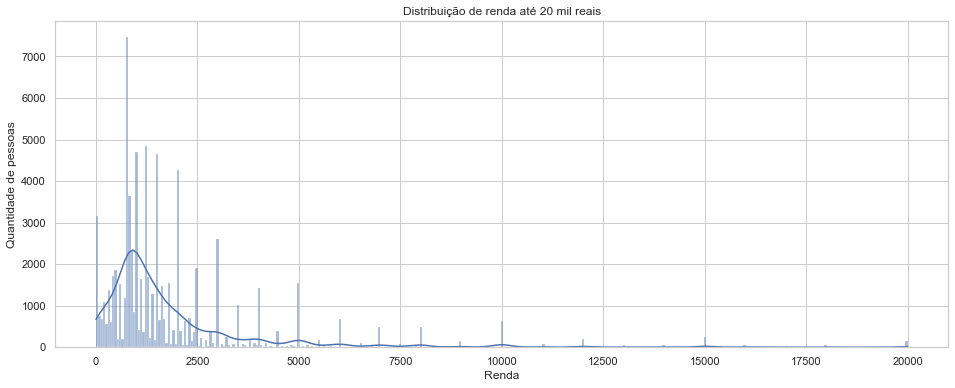

In [27]:
renda_20 = dados.Renda.loc[dados['Renda'] <= 20000]
plt.figure(figsize=(16,6))
sns.histplot(data=renda_20, kde=True)
plt.title('Distribuição de renda até 20 mil reais')
plt.ylabel('Quantidade de pessoas')
plt.show()

### Tabelas de: Frequências e Percentuais do cruzando das variáveis SEXO e COR


In [28]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [29]:
frequencia_sxc = pd.crosstab(dados.Sexo,dados.Cor)
frequencia_sxc.rename(index=sexo,columns=cor, inplace=True)
frequencia_sxc

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [30]:
percentual_sxc = pd.crosstab(dados.Sexo,dados.Cor, normalize=True)*100
percentual_sxc.rename(index=sexo,columns=cor, inplace=True)
percentual_sxc

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões
Atráves destes dados podemos analisar que a etnia parda que são conhecida como "minoria" na verdade são maioria populacional em 2015, e tanto a etnia indigena quanto a amarela se aproximam em ambos os sexos e estas são na verdade a minoria populacional.

## Análise descritiva com a variável RENDA 

### Obtenha a média aritimética

In [31]:
media_renda = dados.Renda.mean()
print(f'A média da renda populacional é {media_renda} .')

A média da renda populacional é 2000.3831988547631 .


### Obtenha a mediana

In [32]:
mediana_renda = dados.Renda.median()
print(f'A mediana da Renda populacional é {mediana_renda} .')

A mediana da Renda populacional é 1200.0 .


### Obtenha a moda

In [33]:
moda_renda = dados.Renda.mode()
print(f'A moda da Renda populacional é {moda_renda[0]} .')

A moda da Renda populacional é 788 .


### Obtenha o desvio médio absoluto

In [34]:
desvio_abs = dados['Renda'].mad()
print(f'O desvio médio absoluto é {desvio_abs} .')

O desvio médio absoluto é 1526.4951371638058 .


### Obtenha a variância

In [35]:
variancia = dados['Renda'].var()
print(f'A variância entre a Renda é {variancia} .')

A variância entre a Renda é 11044906.006217021 .


### Obtenha o desvio-padrão

In [36]:
desvio_padrao = dados['Renda'].std
print(f'O desvio padrão entre a Renda é {desvio_padrao} .')

O desvio padrão entre a Renda é <bound method NDFrame._add_numeric_operations.<locals>.std of 0         800
1        1150
2         880
3        3500
4         150
         ... 
76835     812
76836    1500
76837    1300
76838    1500
76839     900
Name: Renda, Length: 76840, dtype: int64> .


### Média, mediana e valor máximo da variável RENDA segundo SEXO e COR


In [37]:
media_mediana_maximo = pd.crosstab(index= dados.Sexo ,
                        columns= dados.Cor,
                        aggfunc={'mean','median','max'},
                        values = dados.Renda)
media_mediana_maximo.rename(index = sexo, columns=cor, inplace=True)
media_mediana_maximo

max                                        mean               \
Cor       Indígena  Branca  Preta Amarela   Parda     Indígena       Branca   
Sexo                                                                          
Masculino    10000  200000  50000   50000  100000  1081.710938  2925.744435   
Feminino    120000  100000  23000   20000   30000  2464.386139  2109.866750   

                                                   median                  \
Cor              Preta      Amarela        Parda Indígena  Branca   Preta   
Sexo                                                                        
Masculino  1603.861687  4758.251064  1659.577425    797.5  1700.0  1200.0   
Feminino   1134.596400  3027.341880  1176.758516    788.0  1200.0   800.0   

                           
Cor       Amarela   Parda  
Sexo                       
Masculino  2800.0  1200.0  
Feminino   1500.0   800.0

> ### Conclusões

Através dessa tabela podemos analisar desigualdades sociais sobre diversas etnias e talvez possuindo correlações com sexo.


Por exemplo, alguns dados que são estarrecedores: um homem indígena no máximo conseguiu ganhar 10 mil reais, porém, uma mulher indígena conseguiu no máximo 120 mil reais (apresentando  um limite extremo quando comparados). A média masculina fica em torno de 1080 reais, enquanto, o sexo feminino recebe um acima do dobro e a mediana masculina e feminina ficam próximos ao salário mínimo 


A etnia preta masculina possui mesmo máximo que a amarela (50 mil) e o feminino também se aproxima do mesmo máximo da amarela mas quando comparamos a media masculina possui a penúltima menor média quando comparada com outras etnias (indigena masculino é a menor média). A média feminina é a menor média quando comparada a mediana masculina negra, assim como a parda, fica muito próximo do salário mínimo e a mediana feminina preta, assim como a parda, recebem práticamente o salário minimo.


Curiosidade interessante também com a etnia amarela que possui uma média superior em ambos os sexos, e a sua mediana de um homem amarelo possui o quase quatros vezes o salário mínimo da época (788,0) e uma mulher amarela possui a maior renda quando comparada com outras etnias femininas.


### Medidas de dispersão da variável RENDA segundo SEXO e COR


In [38]:
renda_dispersao = pd.crosstab(index= dados.Cor ,
                        columns= dados.Sexo,
                        aggfunc={'mad','var','std'},
                        values = dados.Renda).round(2)
renda_dispersao.rename(index = cor, columns=sexo, inplace=True)
renda_dispersao

mad                std                    var              
Sexo     Masculino Feminino Masculino  Feminino    Masculino      Feminino
Cor                                                                       
Indígena    798.91  3007.89   1204.09  11957.50   1449841.13  1.429818e+08
Branca     2261.01  1670.97   4750.79   3251.01  22570023.41  1.056909e+07
Preta       975.60   705.45   1936.31   1349.80   3749293.59  1.821960e+06
Amarela    3709.60  2549.15   5740.82   3731.17  32957069.62  1.392166e+07
Parda      1125.83   811.58   2312.09   1596.23   5345747.15  2.547960e+06

> ### Conclusões

Nessa análise será estudado respectivamente: desvio padão absoluto, desvio padrão e variancia.

Sobre o desvio padrão absoluto: Na sexo masculina podemos ver que a etnia amarela possui a maior dispersão, e no sexo feminino a etnia que mais dispersa é a índigena, ou seja, possui dados dispersos. A etnia preta possui a menor dispersão em ambos os sexos.


Sobre o desvio padrão: No sexo masculino podemos ver que a etnia que possui a menor dispersão é indígena, ou seja, possui uma valores mais constantes e próximos, enquanto branco é instável.

### Box plot da variável RENDA segundo SEXO e COR

#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [39]:
dados.rename(columns= cor)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


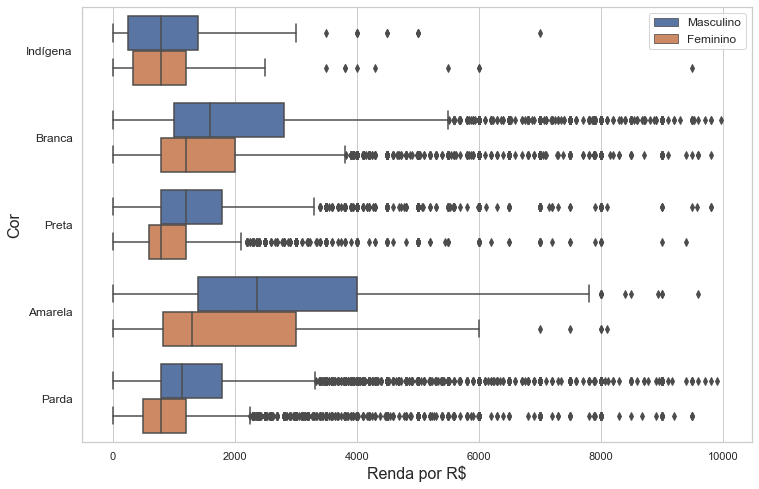

In [40]:
box = sns.boxplot(data = dados.query("Renda<10000"),x='Renda', y='Cor', hue='Sexo', orient='h')
box.figure.set_size_inches(12,8)
box.set_xlabel('Renda por R$', fontsize=16)
box.set_ylabel('Cor', fontsize=16)

box.set_yticklabels(['Indígena','Branca','Preta','Amarela','Parda'],fontsize=12)
handles, _ = box.get_legend_handles_labels()
box.legend(handles,['Masculino','Feminino'], fontsize=12)

plt.show()

> ### Conclusões

Nesta análise podemos visualizar que tem uma diferença interessante é a desigualdade tanto por cor quanto por sexo.

A cor Indígena possui a menor mediana e é a única que sua mediana em ambos os sexos estão próximos, possui a menor variação salariais limites superiores masculino chegando aos 3 mil reais, e pouquíssimos outliers em ambos os sexos recebem acima de 3 mil reais.

A cor amarela possui a mediana está a frente que todas as outras cores, ou seja, essa cor possui uma renda que todos os outros.

### Percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?

#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [41]:
from scipy import stats
percentual = stats.percentileofscore(dados.Renda, 788, kind='weak')
print('Quantidade de pessoas que recebem um salário mínimo: {0:.2f}%'.format(percentual))

Quantidade de pessoas que recebem um salário mínimo: 28.87%


### Valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?


In [42]:
valor = dados.Renda.quantile(0.99)
print('Valor máximo de ganho de 99% das pessoas é R${0:.2f}'.format(valor))

Valor máximo de ganho de 99% das pessoas é R$15000.00


### Média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO


In [43]:
renda_por_sex_e_estudo = pd.crosstab(index= dados['Anos de Estudo'] ,
                                      columns= dados.Sexo,
                                      aggfunc={'max','mad','var','std'},
                                      values = dados.Renda).round(2)
renda_por_sex_e_estudo.rename(index = anos_de_estudo, columns=sexo, inplace=True)
renda_por_sex_e_estudo

mad                max           \
Sexo                           Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
Sem instrução e menos de 1 ano    560.58   425.93     30000    10000   
1 ano                             584.03   350.26     30000     2000   
2 anos                            592.27   376.44     40000     4000   
3 anos                            696.39   349.82     80000     3500   
4 anos                            750.23   392.27     50000    10000   
5 anos                            714.91   374.53     35000     8000   
6 anos                            759.47   351.40     25000     6000   
7 anos                            720.45   356.28     40000     9000   
8 anos                            848.82   422.69     30000    18000   
9 anos                            774.89   405.21     60000    20000   
10 anos                           985.06   389.76     45000     6000   
11 anos                          1166.36   680.15    200000   100000   
12 anos                          1417.12  1081.64     30000   120000   
13 anos                          1869.88  1146.72     25000    20000   
14 anos                          2281.50  1311.51     50000    20000   
15 anos ou mais                  4205.58  2574.04    200000   100000   
Não determinados                  614.09   286.37      7000     3000   

                                     std                   var               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano   1023.90   639.31   1048381.21    408719.24  
1 ano                            1331.95   425.29   1774092.27    180873.15  
2 anos                           1435.17   498.23   2059723.91    248237.29  
3 anos                           2143.80   424.12   4595879.01    179881.55  
4 anos                           1419.82   629.55   2015893.91    396337.48  
5 anos                           1484.65   635.78   2204187.37    404219.57  
6 anos                           1476.63   574.55   2180432.03    330104.29  
7 anos                           1419.71   602.04   2015572.72    362449.79  
8 anos                           1515.58   896.78   2296994.00    804216.54  
9 anos                           2137.66   973.22   4569610.68    947160.38  
10 anos                          2078.61   620.61   4320618.42    385159.14  
11 anos                          2676.54  1819.04   7163860.71   3308908.04  
12 anos                          2268.08  4851.83   5144193.86  23540288.44  
13 anos                          2797.12  2053.79   7823862.39   4218052.42  
14 anos                          3987.21  2064.08  15897883.25   4260440.02  
15 anos ou mais                  7447.61  4212.77  55466948.25  17747437.04  
Não determinados                  979.65   459.99    959711.66    211587.09

### Box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO

#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

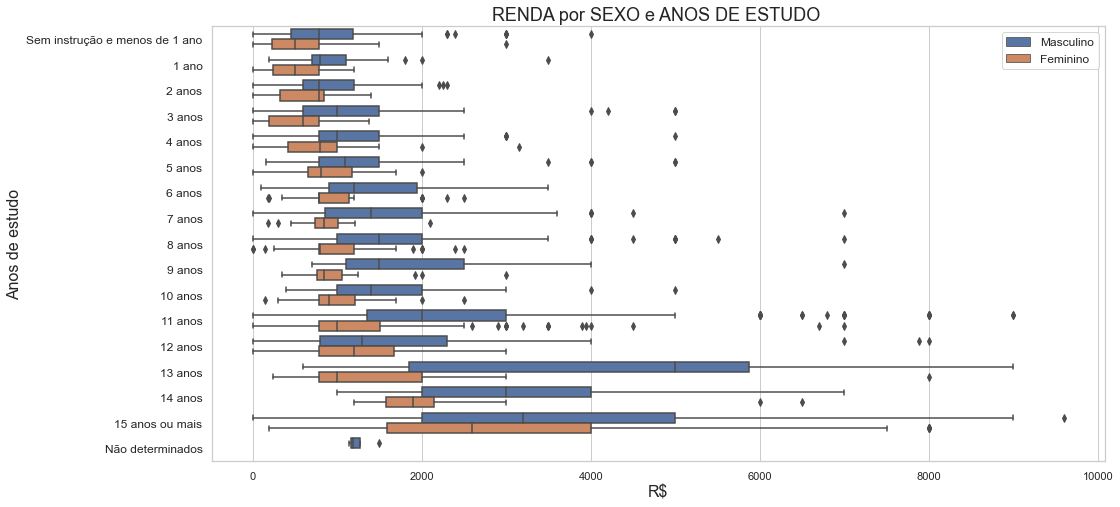

In [44]:
box = sns.boxplot(data = dados.query("Renda < 10000 and Idade == 50"),x='Renda', y='Anos de Estudo', hue='Sexo', orient='h')
box.set_xlabel('R$', fontsize=16)
box.set_ylabel('Anos de estudo', fontsize=16)
box.set_title('RENDA por SEXO e ANOS DE ESTUDO ', fontsize=18)

box.set_yticklabels([key for key in anos_de_estudo.values()],fontsize=12)
handles, _ = box.get_legend_handles_labels()
box.legend(handles,['Masculino','Feminino'], fontsize=12)

box.figure.set_size_inches(16,8)
plt.show()

> ### Conclusões

Nessa análise podemos visualizar uma correlação: quão menor é sua escolaridade menor será sua renda mas existem exceções (outliers).

Em todos os casos os sexo masculino recebe mais que uma mulher.

A renda é proporcional aos anos de estudo.

E apenas homens decidiram a opção "Não determinados".


### Média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO


In [45]:
renda_estatistica_uf = dados.groupby(['UF']).agg({'Renda':['mean','max','mad','std']}) 
renda_estatistica_uf.rename(index = uf)

Renda                                  
                            mean     max          mad          std
UF                                                                
Rondônia             1789.761223   50000  1169.626721  2406.161161
Acre                 1506.091782   30000  1150.422587  2276.233415
Amazonas             1445.130100   22000  1028.809304  1757.935591
Roraima              1783.588889   20000  1304.441235  2079.659238
Pará                 1399.076871   50000   999.540254  2053.779555
Amapá                1861.353516   15580  1248.689445  2020.688632
Tocantins            1771.094946   60000  1402.198504  2934.590741
Maranhão             1019.432009   30000   897.489733  1887.816905
Piauí                1074.550784   40000   963.285816  2373.355726
Ceará                1255.403692   25000   952.410033  1821.963536
Rio Grande do Norte  1344.721480   15500   990.469976  1651.805500
Paraíba              1293.370487   30000  1049.734403  1950.272431
Pernambuco           1527.079319   50000  1163.981389  2389.622497
Alagoas              1144.552602   11000   748.921157  1237.856197
Sergipe              1109.111111   16000   832.634033  1478.997878
Bahia                1429.645094  200000  1122.707117  3507.917248
Minas Gerais         2056.432084  100000  1582.955568  3584.721547
Espírito Santo       2026.383852  100000  1412.212549  3513.846868
Rio de Janeiro       2496.403168  200000  1937.142675  5214.583518
São Paulo            2638.104986   80000  1872.961287  3503.777366
Paraná               2493.870753  200000  1774.665440  4302.937995
Santa Catarina       2470.854945   80000  1519.223781  3137.651112
Rio Grande do Sul    2315.158336   35000  1652.103713  2913.335783
Mato Grosso do Sul   2262.604167   42000  1623.581510  3031.419122
Mato Grosso          2130.652778   35000  1376.571790  2542.630178
Goiás                1994.580794   30000  1231.936851  2221.933065
Distrito Federal     4241.954722  100000  3555.523970  5550.463338

### Box plot com variável RENDA segundo as UNIDADES DA FEDERAÇÃO por SEXO


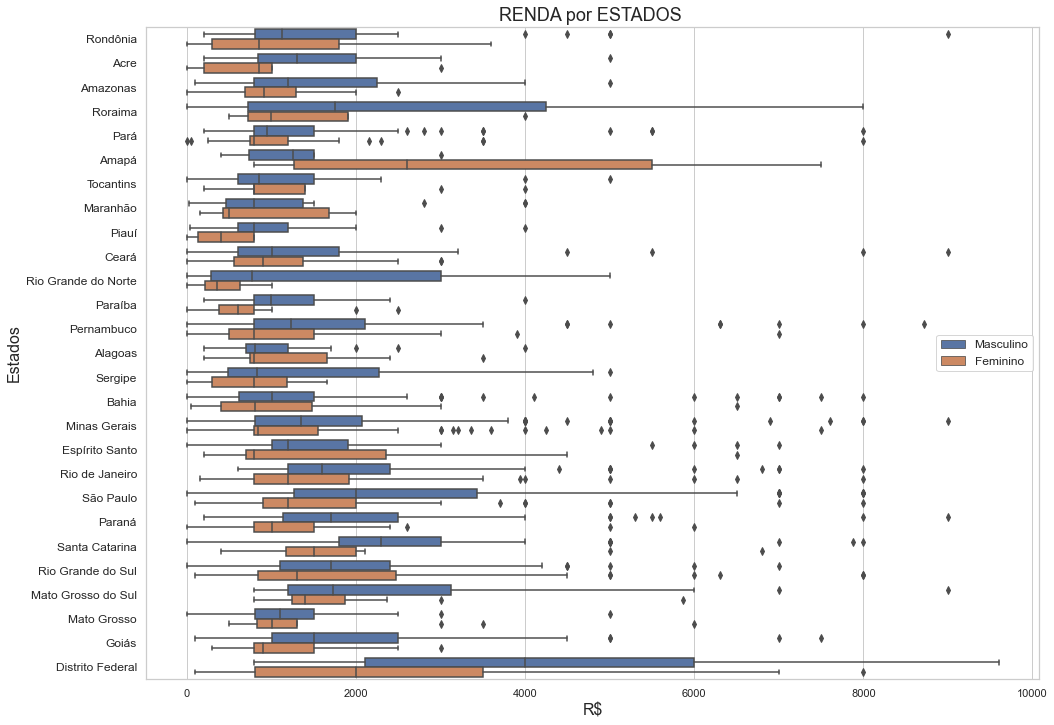

In [46]:
box = sns.boxplot(data = dados.query("Renda < 10000 and Idade == 50"),x='Renda', y='UF', hue='Sexo', orient='h')
box.set_xlabel('R$', fontsize=16)
box.set_ylabel('Estados', fontsize=16)
box.set_title('RENDA por ESTADOS ', fontsize=18)

box.set_yticklabels([key for key in uf.values()],fontsize=12)
handles, _ = box.get_legend_handles_labels()
box.legend(handles,['Masculino','Feminino'], fontsize=12)

box.figure.set_size_inches(16,12)
plt.show()

> ### Conclusões

Nesta análise podemos visualizar alguns fatos curiosos e pertinentes.

Começando com uns mais intrigantes, a variação salarial no Distrito Federal tem uma mediana masculina de 4 mil reais e o primeiro quartil começa acima de 2 mil reais enquanto a mediana feminina é em 2 mil reais. É o único que possui uma variação salarial alta com ambos os sexos e os maiores limites.

No caso de Roraima e Amapá: possuem variações em sexos destintos com Amapá possuindo o maior salário feminino no Brasil e Roraima como o segundo melhor salário masculino.

<strong>Para pensar: Valorize o Trabalho que salva o ambiente.</strong>